# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [13]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report  


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [14]:
# Memuat dataset dari file CSV  
df = pd.read_csv('dataset_clustering.csv')  
# Menampilkan informasi dasar dari DataFrame  
print(df.info())  
print(df.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   float64
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   float64
 13  LoginAttempts            2512 non-null   float64
 14  AccountBalance          

In [15]:
# Normalisasi Data 

# Normalisasi untuk Fitur Numerik Menggunakan StandardScaler  
scaler = StandardScaler()  
numeric_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',  
                    'LoginAttempts', 'AccountBalance']  

df[numeric_features] = scaler.fit_transform(df[numeric_features])  

# Normalisasi untuk Fitur Kategorikal Menggunakan Label Encoding  
label_encoders = {}  
categorical_features = ['TransactionType', 'Location', 'DeviceID',   
                        'MerchantID', 'Channel', 'CustomerOccupation',   
                        'AgeGroup', 'AmountGroup']  

for feature in categorical_features:  
    le = LabelEncoder()  
    df[feature] = le.fit_transform(df[feature])  
    label_encoders[feature] = le 

# Menampilkan DataFrame Setelah Normalisasi  
print(df.head())  

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType  Location  DeviceID      IP Address  MerchantID  Channel  \
0                1        36       365  162.198.218.92          14        0   
1                1        15        50     13.149.61.4          51        0   
2                1        23       229  215.97.143.157           8        2   
3                1        33       182  200.13.225.150           1        2   
4                0         1       298    65.164.3.100          90        2   

   ...  CustomerOccupation  TransactionDuration  LoginAttempts  \
0  ...                   0            -0.552

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [16]:
# Menghapus kolom yang tidak relevan untuk model  
columns_to_drop = ['TransactionID', 'AccountID', 'PreviousTransactionDate', 'DeviceID' ,'IP Address', 'TransactionDate', 'PreviousTransactionDate']   
X = df.drop(columns=columns_to_drop + ['Cluster'])  
y = df['Cluster']  

# Split data menjadi set pelatihan dan set uji  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Split data menjadi set pelatihan dan set uji  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split  
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")  
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")
print(df.head())


Training set shape: X_train=(2009, 14), y_train=(2009,)
Test set shape: X_test=(503, 14), y_test=(503,)
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType  Location  DeviceID      IP Address  MerchantID  Channel  \
0                1        36       365  162.198.218.92          14        0   
1                1        15        50     13.149.61.4          51        0   
2                1        23       229  215.97.143.157           8        2   
3                1        33       182  200.13.225.150           1        2   
4                0         1       298    65.164.3.100          90        2   

   ...

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [17]:
# Melatih Model Random Forest  
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)  

# Memprediksi Set Uji  
y_pred = rf_model.predict(X_test)  

Saya menggunakan algoritma Random Forest untuk melakukan klasifikasi dalam proyek deteksi fraud ini. Keunggulan dari algoritma ini terletak pada kemampuannya untuk mengurangi risiko overfitting yang bisa saja merupakan sebuah data penting dalam mengindikasi fraud, serta meningkatkan akurasi prediksi dengan menggabungkan hasil dari berbagai pohon. Dalam konteks deteksi penipuan, Random Forest efektif dalam menangani dataset yang besar dan kompleks, serta mampu menangkap interaksi non-linear antar fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00


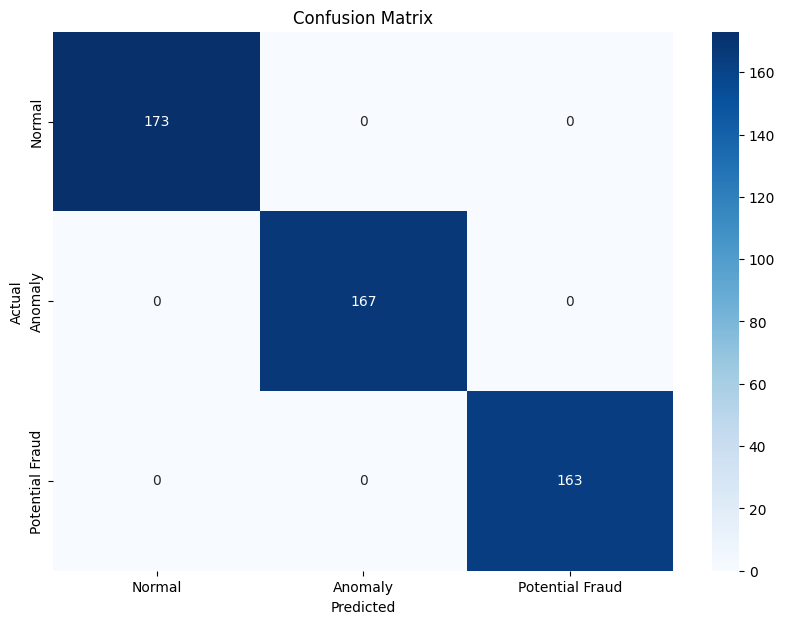

In [18]:
# Melatih Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  
rf_model.fit(X_train, y_train)  

# Memprediksi Set Uji  
y_pred = rf_model.predict(X_test)  

# Menghitung Metrik Evaluasi  
accuracy = accuracy_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred, average='weighted')  # untuk menghitung F1-Score  
precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']  
recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']  

# Menampilkan Hasil Metrik  
print(f"Accuracy: {accuracy:.2f}")  
print(f"F1 Score: {f1:.2f}")  
print(f"Precision: {precision:.2f}")  
print(f"Recall: {recall:.2f}")  

# Membuat Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()  

Algoritma Perbandingan: KNN

Accuracy (k-NN): 0.98
F1 Score (k-NN): 0.98


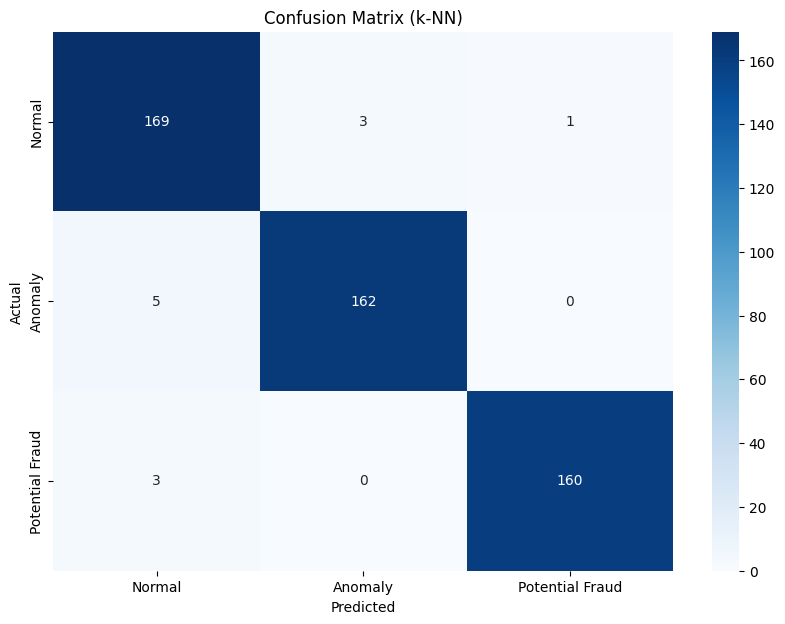

In [19]:
# Melatih Model k-NN  
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(X_train, y_train)  

# Memprediksi Set Uji  
y_pred_knn = knn_model.predict(X_test)  

# Menghitung Metrik Evaluasi  
accuracy_knn = accuracy_score(y_test, y_pred_knn)  
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  

# Menampilkan Hasil Metrik  
print(f"Accuracy (k-NN): {accuracy_knn:.2f}")  
print(f"F1 Score (k-NN): {f1_knn:.2f}")  

# Membuat Confusion Matrix  
cm_knn = confusion_matrix(y_test, y_pred_knn)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix (k-NN)')  
plt.show()  

| Metrik                     | Random Forest | k-Nearest Neighbors (k-NN) |
|---------------------------|----------------|------------------------------|
| **Akurasi**               | 1.00 (100%)    | 0.98 (98%)                   |
| **F1 Score**              | 1.00           | 0.98                         |
| **Precision**             | 1.00           | -                            |
| **Recall**                | 1.00           | -                            |
| **True Positives (TP)**   | 173 (Normal)   | 169 (Normal)                 |
| **True Negatives (TN)**   | 330            | 322                          |
| **False Positives (FP)**  | 0              | 7                            |
| **False Negatives (FN)**  | 0              | 8                            | 


1. **Random Forest** menunjukkan performa sempurna dengan **akurasi, F1 Score, precision, dan recall sebesar 100%**. Semua transaksi berhasil diklasifikasikan dengan benar.
2. **Model k-NN** juga menunjukkan kinerja sangat baik, dengan akurasi 98% dan F1 Score 0.98, meskipun terdapat beberapa kesalahan klasifikasi:
   - 3 transaksi Normal diklasifikasikan sebagai Anomaly
   - 1 transaksi Normal diklasifikasikan sebagai Potential Fraud
   - 5 transaksi Anomaly diklasifikasikan sebagai Normal
   - 3 transaksi Potential Fraud diklasifikasikan sebagai Normal
3. Random Forest sangat cocok untuk sistem deteksi fraud karena memberikan hasil klasifikasi yang akurat dan minim kesalahan.
4. k-NN cenderung sensitif terhadap data yang mirip antar kelas, sehingga potensi kesalahan lebih tinggi pada data yang kompleks atau tidak terstruktur.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


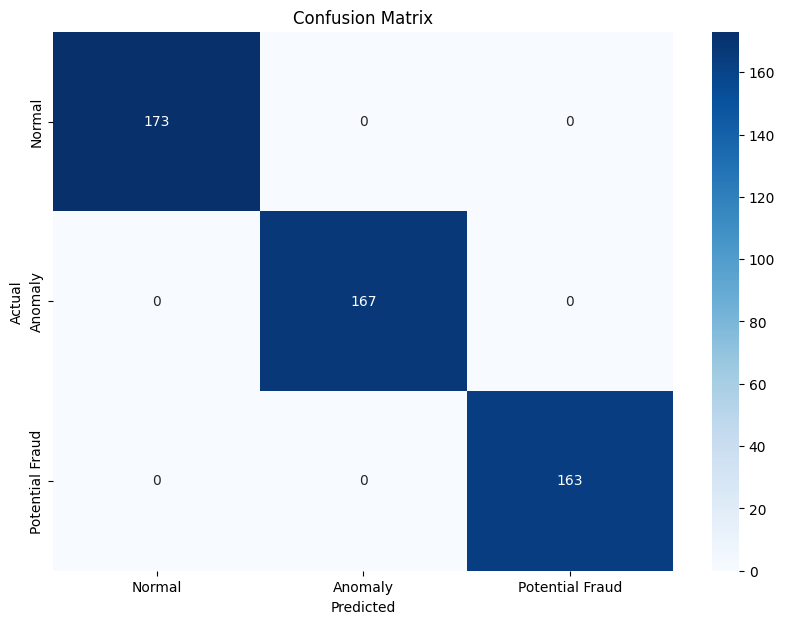

In [20]:
# Menyusun Parameter Grid untuk GridSearch  
param_grid = {  
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}  

# Menggunakan GridSearchCV untuk Menemukan Kombinasi Hyperparameter Terbaik  
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, verbose=2,  n_jobs=-1)  

# Melatih Model dengan Hyperparameter  
grid_search.fit(X_train, y_train)  

# Menampilkan Hyperparameter Terbaik yang Ditemukan  
print("Best Hyperparameters: ", grid_search.best_params_)  

# Menyimpan Model Terbaik  
best_rf_model = grid_search.best_estimator_  

# Memprediksi Set Uji menggunakan Model Terbaik  
y_pred_best = best_rf_model.predict(X_test)  

# Membuat Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()  

Perbandingan: KNN

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters for k-NN:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy (k-NN) with Best Hyperparameters: 0.99
F1 Score (k-NN) with Best Hyperparameters: 0.99


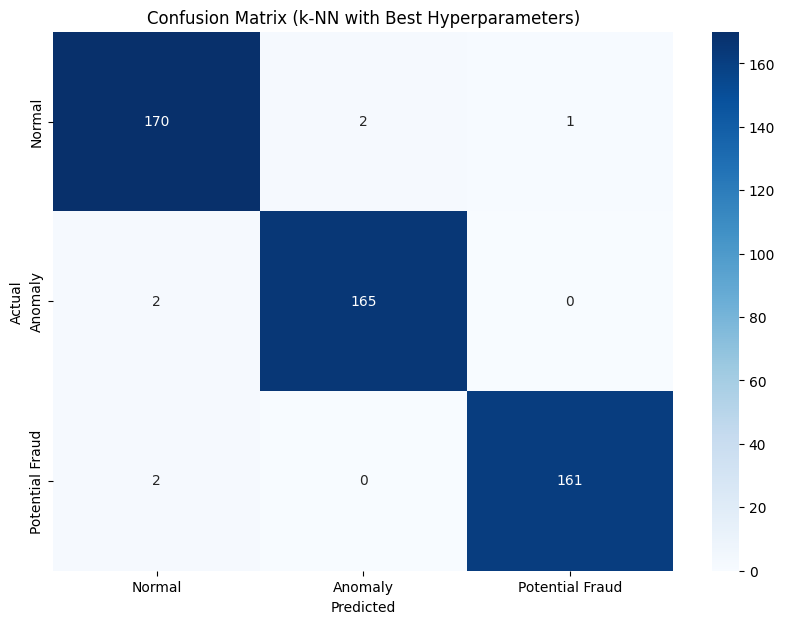

In [21]:
# Menyusun Parameter Grid untuk GridSearch  
param_grid = {  
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan'] 
}  

# Menggunakan GridSearchCV untuk Menemukan Kombinasi Hyperparameter Terbaik  
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),  param_grid=param_grid,  cv=5,  verbose=2,  n_jobs=-1) 

# Melatih Model dengan Hyperparameter  
grid_search_knn.fit(X_train, y_train)  

# Menampilkan Hyperparameter Terbaik yang Ditemukan  
print("Best Hyperparameters for k-NN: ", grid_search_knn.best_params_)  

# Menyimpan Model Terbaik  
best_knn_model = grid_search_knn.best_estimator_  

# Memprediksi Set Uji menggunakan Model Terbaik  
y_pred_knn_best = best_knn_model.predict(X_test)  

# Menghitung Metrik Evaluasi  
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)  
f1_knn_best = f1_score(y_test, y_pred_knn_best, average='weighted')  

# Menampilkan Hasil Metrik  
print(f"Accuracy (k-NN) with Best Hyperparameters: {accuracy_knn_best:.2f}")  
print(f"F1 Score (k-NN) with Best Hyperparameters: {f1_knn_best:.2f}")  

# Membuat Confusion Matrix  
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_knn_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix (k-NN with Best Hyperparameters)')  
plt.show()  

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy: 1.00
F1 Score: 1.00
Precision: 1.00
Recall: 1.00


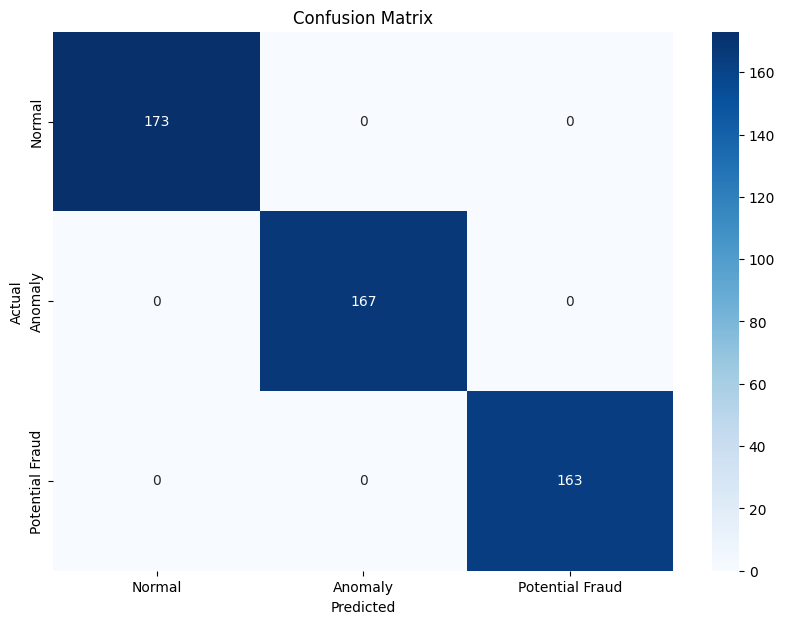

In [ ]:
# {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# Melatih Model Random Forest dengan hasil hyperparameter tuning
rf_model = RandomForestClassifier(min_samples_leaf=1, n_estimators=50, min_samples_split = 2)  
rf_model.fit(X_train, y_train)  

# Memprediksi Set Uji  
y_pred = rf_model.predict(X_test)  

# Menghitung Metrik Evaluasi  
accuracy = accuracy_score(y_test, y_pred)  
f1 = f1_score(y_test, y_pred, average='weighted') 
precision = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['precision']  
recall = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['recall']  

# Menampilkan Hasil Metrik  
print(f"Accuracy: {accuracy:.2f}")  
print(f"F1 Score: {f1:.2f}")  
print(f"Precision: {precision:.2f}")  
print(f"Recall: {recall:.2f}")  

# Membuat Confusion Matrix  
cm = confusion_matrix(y_test, y_pred)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix')  
plt.show()  

Perbandingan: KNN

Accuracy (k-NN): 0.99
F1 Score (k-NN): 0.99


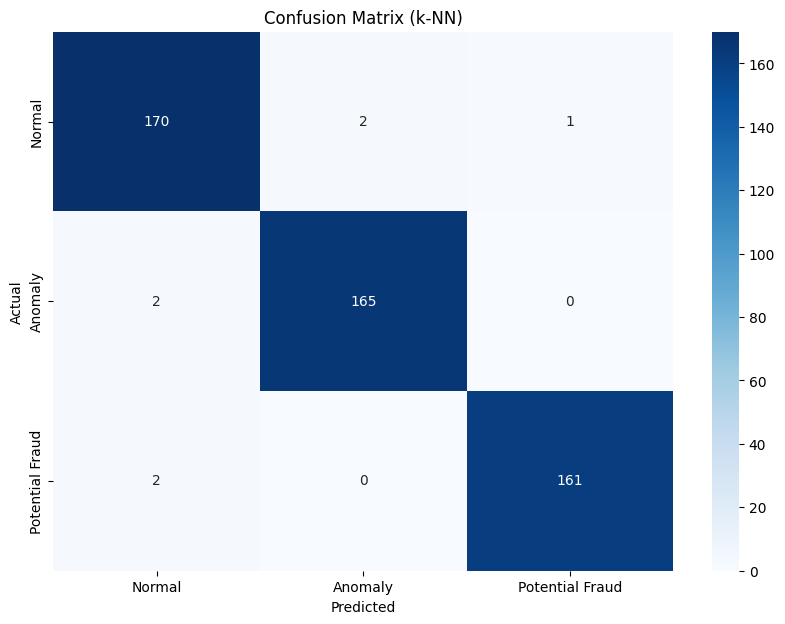

In [29]:
# {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
# Melatih Model k-NN dengan hasil hyperparameter
knn_model = KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='manhattan') 
knn_model.fit(X_train, y_train)  

# Memprediksi Set Uji  
y_pred_knn = knn_model.predict(X_test)  

# Menghitung Metrik Evaluasi  
accuracy_knn = accuracy_score(y_test, y_pred_knn)  
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')  

# Menampilkan Hasil Metrik  
print(f"Accuracy (k-NN): {accuracy_knn:.2f}")  
print(f"F1 Score (k-NN): {f1_knn:.2f}")  

# Membuat Confusion Matrix  
cm_knn = confusion_matrix(y_test, y_pred_knn)  

# Visualisasi Confusion Matrix  
plt.figure(figsize=(10, 7))  
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Anomaly', 'Potential Fraud'], yticklabels=['Normal', 'Anomaly', 'Potential Fraud'])  
plt.ylabel('Actual')  
plt.xlabel('Predicted')  
plt.title('Confusion Matrix (k-NN)')  
plt.show()  

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

| Model            | Parameter                                                         | Accuracy | F1 Score | Precision | Recall | Kecepatan Eksekusi |
|------------------|-------------------------------------------------------------------|----------|----------|-----------|--------|---------------------|
| **Sebelum Tuning** |                                                                   |          |          |           |        |                     |
| Random Forest    | n_estimators=100, random_state=42                                 | 1.00     | 1.00     | 1.00      | 1.00   | 0.8s                |
| k-NN             | n_neighbors=5                                                     | 0.98     | 0.98     | -         | -      | 0.4s                |
| **Setelah Tuning**|                                                                   |          |          |           |        |                     |
| Random Forest    | min_samples_leaf=1, n_estimators=50, min_samples_split = 2       | 1.00     | 1.00     | 1.00      | 1.00   | 0.7s                |
| k-NN             | n_neighbors=11, weights='uniform', metric='manhattan'                 | 0.99     | 0.99     | -         | -      | 0.4s                |

### 1. Hasil Evaluasi dan Hyperparameter Tuning:
- **Random Forest** berhasil mempertahankan skor evaluasi sempurna (akurasi, precision, recall, dan F1-score = 1.00) baik sebelum maupun sesudah tuning. Tuning justru mempercepat waktu eksekusi dari 0.8s menjadi 0.7s tanpa mengorbankan performa.
- **k-NN** menunjukkan penurunan kesalahan klasifikasi yang terdapat pada confusion matrix, dengan hasil 0.99 pada skor evaluasi. Terdapat kenaikan skor sebesar 0.01 poin (0.98 -> 0.99). Namun tidak ada perubahan pada waktu eksekusi.

### 2. Identifikasi Kelemahan Model:
- **k-NN** masih memiliki kelemahan dalam klasifikasi yang menyebabkan misclassification.
- **Random Forest** hasil sempurna dan tidak menunjukkan kesalahan klasifikasi. Namun, tetap ada potensi risiko overfitting yang harus diuji pada dataset yang lebih besar.

### 3. Rekomendasi Lanjutan:
- Untuk menguji generalisasi model, gunakan dataset yang lebih besar untuk melihat apakah performa masih stabil atau ada kecenderungan overfitting.